In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_enhancer_zscore_junke")
dir(fdiry)

[1] "description.tsv"                                
[2] "enhancer_zscore_junke.concat.STARR.bed.gz"      
[3] "enhancer_zscore_junke.concat.STARRMPRA.bed.gz"  
[4] "enhancer_zscore_junke.merge.STARR.bed.gz"       
[5] "enhancer_zscore_junke.merge.STARRMPRA.bed.gz"   
[6] "enhancer_zscore_junke.peak.ASTARR.bed.gz"       
[7] "enhancer_zscore_junke.peak.LMPRA.bed.gz"        
[8] "enhancer_zscore_junke.peak.TMPRA_GATAMYC.bed.gz"
[9] "enhancer_zscore_junke.peak.WSTARR.bed.gz"

In [3]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "hic_intact_ENCSR479XDG", 
    "loop",
    "annotation_enhancer_zscore_junke"
)
dir(fdiry)

[1] "loopA.annotation.enhancer_zscore_junke_peak_astarr.bed.gz"       
 [2] "loopA.annotation.enhancer_zscore_junke_peak_wstarr.bed.gz"       
 [3] "loopA.annotation.enhancer_zscore_junke.concat.STARR.bed.gz"      
 [4] "loopA.annotation.enhancer_zscore_junke.concat.STARRMPRA.bed.gz"  
 [5] "loopA.annotation.enhancer_zscore_junke.merge.STARR.bed.gz"       
 [6] "loopA.annotation.enhancer_zscore_junke.merge.STARRMPRA.bed.gz"   
 [7] "loopA.annotation.enhancer_zscore_junke.peak.ASTARR.bed.gz"       
 [8] "loopA.annotation.enhancer_zscore_junke.peak.LMPRA.bed.gz"        
 [9] "loopA.annotation.enhancer_zscore_junke.peak.TMPRA_GATAMYC.bed.gz"
[10] "loopA.annotation.enhancer_zscore_junke.peak.WSTARR.bed.gz"       
[11] "loopB.annotation.enhancer_zscore_junke_peak_astarr.bed.gz"       
[12] "loopB.annotation.enhancer_zscore_junke_peak_wstarr.bed.gz"       
[13] "loopB.annotation.enhancer_zscore_junke.concat.STARR.bed.gz"      
[14] "loopB.annotation.enhancer_zscore_junke.concat.STARRMPRA.bed.gz"  
[15] "loopB.annotation.enhancer_zscore_junke.merge.STARR.bed.gz"       
[16] "loopB.annotation.enhancer_zscore_junke.merge.STARRMPRA.bed.gz"   
[17] "loopB.annotation.enhancer_zscore_junke.peak.ASTARR.bed.gz"       
[18] "loopB.annotation.enhancer_zscore_junke.peak.LMPRA.bed.gz"        
[19] "loopB.annotation.enhancer_zscore_junke.peak.TMPRA_GATAMYC.bed.gz"
[20] "loopB.annotation.enhancer_zscore_junke.peak.WSTARR.bed.gz"

In [4]:
folder = "annotation_enhancer_zscore_junke"
fdiry  = file.path(FD_RES, "results", "region", folder)
fname = "description.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_cnames = dat
print(dim(dat))
dat

Rows: 4 Columns: 2
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Name, Description

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 4 2


Name,Description
<chr>,<chr>
Chrom,Seqnames
Start,Start
End,End
Assay,Assay label


In [5]:
### init
annotation = "Enhancer_ZScore_Junke"
label      = "Enhancer_STARRMPRA"
cnames = dat_cnames$Name
cnames = c("Chrom_Loop", "Start_Loop", "End_Loop", cnames, "Overlap")

###
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "hic_intact_ENCSR479XDG", 
    "loop",
    "annotation_enhancer_zscore_junke"
)
fname = "loopA.annotation.enhancer_zscore_junke.merge.STARRMPRA.bed.gz"
fpath = file.path(fdiry, fname)


### read data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% dplyr::rowwise() %>% dplyr::mutate(
    LoopA      = paste0(
        Chrom_Loop, 
        ":",
        format(Start_Loop, scientific=FALSE), 
        "-",
        format(End_Loop,   scientific=FALSE)),
    Annotation = annotation,
    Label      = label
)


### assign and show
dat_loopA_annot_starrmpra = dat
print(dim(dat))
head(dat)

[1] 14962    11


Chrom_Loop,Start_Loop,End_Loop,Chrom,Start,End,Assay,Overlap,LoopA,Annotation,Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,770000,780000,chr1,778420,779050,WSTARR,630,chr1:770000-780000,Enhancer_ZScore_Junke,Enhancer_STARRMPRA
chr1,904000,906000,chr1,904350,904550,LMPRA,200,chr1:904000-906000,Enhancer_ZScore_Junke,Enhancer_STARRMPRA
chr1,1000000,1005000,chr1,1000690,1000990,WSTARR,300,chr1:1000000-1005000,Enhancer_ZScore_Junke,Enhancer_STARRMPRA
chr1,1000000,1005000,chr1,1001030,1001180,WSTARR,150,chr1:1000000-1005000,Enhancer_ZScore_Junke,Enhancer_STARRMPRA
chr1,1000000,1005000,chr1,1003910,1004100,WSTARR,190,chr1:1000000-1005000,Enhancer_ZScore_Junke,Enhancer_STARRMPRA
chr1,1020000,1025000,chr1,1021790,1022250,WSTARR,460,chr1:1020000-1025000,Enhancer_ZScore_Junke,Enhancer_STARRMPRA


In [6]:
### init
annotation = "Enhancer_ZScore_Junke"
label      = "Enhancer_STARRMPRA"
cnames = dat_cnames$Name
cnames = c("Chrom_Loop", "Start_Loop", "End_Loop", cnames, "Overlap")

###
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "hic_intact_ENCSR479XDG", 
    "loop",
    "annotation_enhancer_zscore_junke"
)
fname = "loopB.annotation.enhancer_zscore_junke.merge.STARRMPRA.bed.gz"
fpath = file.path(fdiry, fname)


### read data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% dplyr::rowwise() %>% dplyr::mutate(
    LoopB      = paste0(
        Chrom_Loop, 
        ":",
        format(Start_Loop, scientific=FALSE), 
        "-",
        format(End_Loop,   scientific=FALSE)),
    Annotation = annotation,
    Label      = label
)


### assign and show
dat_loopB_annot_starrmpra = dat
print(dim(dat))
head(dat)

[1] 15128    11


Chrom_Loop,Start_Loop,End_Loop,Chrom,Start,End,Assay,Overlap,LoopB,Annotation,Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,1060000,1065000,chr1,1064070,1064300,WSTARR,230,chr1:1060000-1065000,Enhancer_ZScore_Junke,Enhancer_STARRMPRA
chr1,1060000,1065000,chr1,1064510,1064750,WSTARR,240,chr1:1060000-1065000,Enhancer_ZScore_Junke,Enhancer_STARRMPRA
chr1,1060000,1065000,chr1,1064070,1064300,WSTARR,230,chr1:1060000-1065000,Enhancer_ZScore_Junke,Enhancer_STARRMPRA
chr1,1060000,1065000,chr1,1064510,1064750,WSTARR,240,chr1:1060000-1065000,Enhancer_ZScore_Junke,Enhancer_STARRMPRA
chr1,1060000,1065000,chr1,1064070,1064300,WSTARR,230,chr1:1060000-1065000,Enhancer_ZScore_Junke,Enhancer_STARRMPRA
chr1,1060000,1065000,chr1,1064510,1064750,WSTARR,240,chr1:1060000-1065000,Enhancer_ZScore_Junke,Enhancer_STARRMPRA


In [12]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_enhancer_zscore_junke"
)
fname = "enhancer_zscore_junke.merge.STARRMPRA.bed.gz"
fpath = file.path(fdiry, fname)


### read data
cnames = dat_cnames$Name
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)

dat_peak_annot_starrmpra = dat
print(dim(dat))
head(dat)

[1] 49102     4


Chrom,Start,End,Assay
<chr>,<dbl>,<dbl>,<chr>
chr1,778420,779050,WSTARR
chr1,827430,827560,WSTARR
chr1,904350,904550,LMPRA
chr1,941699,941899,LMPRA
chr1,959200,959620,"LMPRA,WSTARR"
chr1,960501,960701,LMPRA


In [13]:
dat = dat_peak_annot_starrmpra
dat = dat %>% dplyr::select(Chrom, Start, End) %>% dplyr::distinct()
print(dim(dat))

[1] 49102     3


In [14]:
dat1 = dat_loopA_annot_starrmpra %>% dplyr::select(Chrom, Start, End, Assay) %>% dplyr::distinct()
dat2 = dat_loopB_annot_starrmpra %>% dplyr::select(Chrom, Start, End, Assay) %>% dplyr::distinct()
dat  = bind_rows(dat1, dat2) %>% dplyr::distinct()

dat_loop_annot_starrmpra = dat
print(dim(dat1))
print(dim(dat2))
print(dim(dat))
head(dat)

[1] 9192    4
[1] 9154    4
[1] 14916     4


Chrom,Start,End,Assay
<chr>,<dbl>,<dbl>,<chr>
chr1,778420,779050,WSTARR
chr1,904350,904550,LMPRA
chr1,1000690,1000990,WSTARR
chr1,1001030,1001180,WSTARR
chr1,1003910,1004100,WSTARR
chr1,1021790,1022250,WSTARR


In [18]:
dat = tribble(
    ~Assay,       ~Category,                ~Count,
    "STARR/MPRA", "Within Loop anchor",     14916,
    "STARR/MPRA", "Not Within Loop anchor", 49102 - 14916
)
dat

Assay,Category,Count
<chr>,<chr>,<dbl>
STARR/MPRA,Within Loop anchor,14916
STARR/MPRA,Not Within Loop anchor,34186


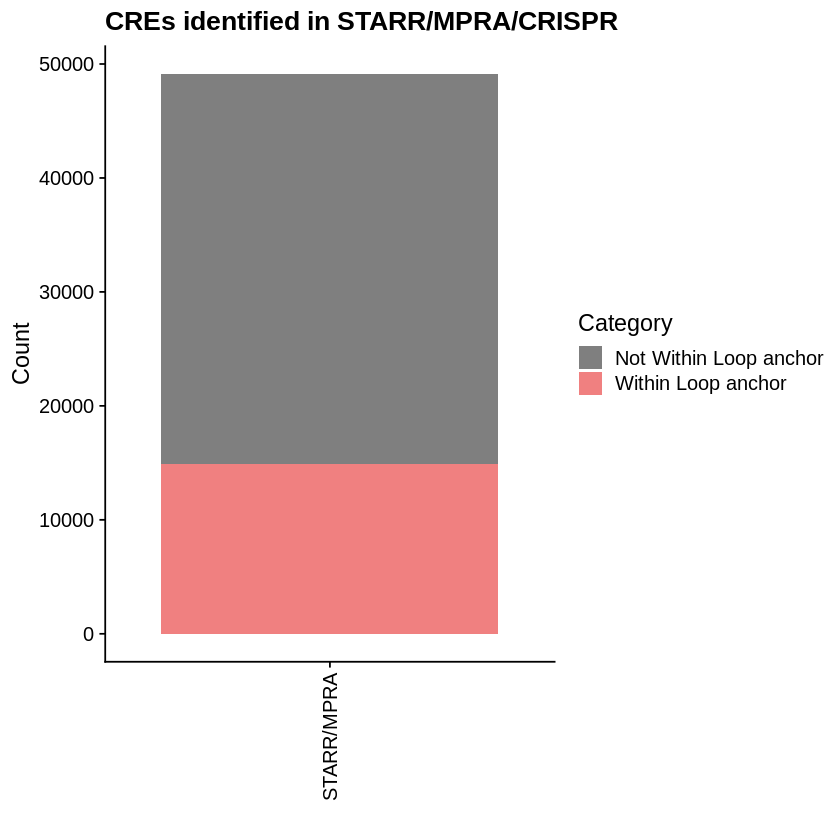

In [29]:
scale_fill = scale_fill_manual(values =c("Not Within Loop anchor" = "grey50", "Within Loop anchor" = "lightcoral"))

gpt = ggplot(dat, aes(x=Assay, y=Count, fill=Category)) + 
    geom_col() +
    labs(x="", title="CREs identified in STARR/MPRA/CRISPR") +
    theme_cowplot() +
    theme(axis.text.x=element_text(angle=90, vjust=0.5, hjust=1)) +
    scale_fill

print(gpt)

In [31]:
14916/49102

[1] 0.3037758

In [12]:
### init
annotation = "Enhancer"
label      = "Enhancer_ZScore_ASTARR"
cnames = dat_cnames$Name
cnames = c("Chrom_Loop", "Start_Loop", "End_Loop", cnames, "Overlap")

###
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "hic_intact_ENCSR479XDG", 
    "loop",
    "annotation_enhancer_zscore_junke"
)
fname = "loopA.annotation.enhancer_zscore_junke_peak_astarr.bed.gz"
fpath = file.path(fdiry, fname)


### read data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% dplyr::rowwise() %>% dplyr::mutate(
    LoopA      = paste0(
        Chrom_Loop, 
        ":",
        format(Start_Loop, scientific=FALSE), 
        "-",
        format(End_Loop,   scientific=FALSE)),
    Annotation = annotation,
    Label      = label
)


### assign and show
dat_loopA_annot_astarr = dat
print(dim(dat))
head(dat)

[1] 1557   18


Chrom_Loop,Start_Loop,End_Loop,Chrom,Start,End,Name,Log2FC,Strand,Zscore,summit_Start,summit_End,summit_Log2FC,summit_Zscore,Overlap,LoopA,Annotation,Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,5915000,5920000,chr1,5917710,5917930,peak_both_6,2.640920,.,2.169290,5917760,5917860,2.806423,2.286066,220,chr1:5915000-5920000,Enhancer,Enhancer_ZScore_ASTARR
chr1,11842000,11843000,chr1,11842320,11842500,peak_both_14,2.789535,.,2.274151,11842370,11842470,2.995219,2.419278,180,chr1:11842000-11843000,Enhancer,Enhancer_ZScore_ASTARR
chr1,11842000,11844000,chr1,11842320,11842500,peak_both_14,2.789535,.,2.274151,11842370,11842470,2.995219,2.419278,180,chr1:11842000-11844000,Enhancer,Enhancer_ZScore_ASTARR
chr1,12448000,12450000,chr1,12448880,12449190,peak_both_15,2.916206,.,2.363527,12448990,12449090,3.311143,2.642188,310,chr1:12448000-12450000,Enhancer,Enhancer_ZScore_ASTARR
chr1,12448000,12450000,chr1,12448880,12449190,peak_both_15,2.916206,.,2.363527,12448990,12449090,3.311143,2.642188,310,chr1:12448000-12450000,Enhancer,Enhancer_ZScore_ASTARR
chr1,14422000,14424000,chr1,14422210,14422360,peak_both_19,2.560252,.,2.112373,14422230,14422330,2.691481,2.204965,150,chr1:14422000-14424000,Enhancer,Enhancer_ZScore_ASTARR


In [13]:
### init
annotation = "Enhancer"
label      = "Enhancer_ZScore_WSTARR"
cnames = dat_cnames$Name
cnames = c("Chrom_Loop", "Start_Loop", "End_Loop", cnames, "Overlap")

###
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "hic_intact_ENCSR479XDG", 
    "loop",
    "annotation_enhancer_zscore_junke"
)
fname = "loopA.annotation.enhancer_zscore_junke_peak_wstarr.bed.gz"
fpath = file.path(fdiry, fname)


### read data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% dplyr::rowwise() %>% dplyr::mutate(
    LoopA      = paste0(
        Chrom_Loop, 
        ":",
        format(Start_Loop, scientific=FALSE), 
        "-",
        format(End_Loop,   scientific=FALSE)),
    Annotation = annotation,
    Label      = label
)


### assign and show
dat_loopA_annot_wstarr = dat
print(dim(dat))
head(dat)

[1] 7631   18


Chrom_Loop,Start_Loop,End_Loop,Chrom,Start,End,Name,Log2FC,Strand,Zscore,summit_Start,summit_End,summit_Log2FC,summit_Zscore,Overlap,LoopA,Annotation,Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,770000,780000,chr1,778420,779050,peak_both_1,1.716052,.,3.133377,778630,778730,2.248917,4.143803,630,chr1:770000-780000,Enhancer,Enhancer_ZScore_WSTARR
chr1,1000000,1005000,chr1,1000690,1000990,peak_both_5,1.176388,.,2.110060,1000790,1000890,1.255087,2.259289,300,chr1:1000000-1005000,Enhancer,Enhancer_ZScore_WSTARR
chr1,1000000,1005000,chr1,1001030,1001180,peak_both_6,1.333345,.,2.407682,1001050,1001150,1.368707,2.474737,150,chr1:1000000-1005000,Enhancer,Enhancer_ZScore_WSTARR
chr1,1000000,1005000,chr1,1003910,1004100,peak_both_7,1.195468,.,2.146239,1003910,1004010,1.229472,2.210717,190,chr1:1000000-1005000,Enhancer,Enhancer_ZScore_WSTARR
chr1,1020000,1025000,chr1,1021790,1022250,peak_both_12,1.323528,.,2.389068,1021920,1022020,1.490026,2.704782,460,chr1:1020000-1025000,Enhancer,Enhancer_ZScore_WSTARR
chr1,1116000,1118000,chr1,1115970,1116170,peak_both_20,1.245184,.,2.240511,1116020,1116120,1.277292,2.301394,170,chr1:1116000-1118000,Enhancer,Enhancer_ZScore_WSTARR


In [14]:
### init
annotation = "Enhancer"
label      = "Enhancer_ZScore_ASTARR"
cnames = dat_cnames$Name
cnames = c("Chrom_Loop", "Start_Loop", "End_Loop", cnames, "Overlap")

###
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "hic_intact_ENCSR479XDG", 
    "loop",
    "annotation_enhancer_zscore_junke"
)
fname = "loopB.annotation.enhancer_zscore_junke_peak_astarr.bed.gz"
fpath = file.path(fdiry, fname)


### read data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% dplyr::rowwise() %>% dplyr::mutate(
    LoopB      = paste0(
        Chrom_Loop, 
        ":",
        format(Start_Loop, scientific=FALSE), 
        "-",
        format(End_Loop,   scientific=FALSE)),
    Annotation = annotation,
    Label      = label
)


### assign and show
dat_loopB_annot_astarr = dat
print(dim(dat))
head(dat)

[1] 1573   18


Chrom_Loop,Start_Loop,End_Loop,Chrom,Start,End,Name,Log2FC,Strand,Zscore,summit_Start,summit_End,summit_Log2FC,summit_Zscore,Overlap,LoopB,Annotation,Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,5910000,5920000,chr1,5917710,5917930,peak_both_6,2.640920,.,2.169290,5917760,5917860,2.806423,2.286066,220,chr1:5910000-5920000,Enhancer,Enhancer_ZScore_ASTARR
chr1,5915000,5920000,chr1,5917710,5917930,peak_both_6,2.640920,.,2.169290,5917760,5917860,2.806423,2.286066,220,chr1:5915000-5920000,Enhancer,Enhancer_ZScore_ASTARR
chr1,5916000,5918000,chr1,5917710,5917930,peak_both_6,2.640920,.,2.169290,5917760,5917860,2.806423,2.286066,220,chr1:5916000-5918000,Enhancer,Enhancer_ZScore_ASTARR
chr1,8900000,8902000,chr1,8900040,8900240,peak_both_11,2.704947,.,2.214467,8900090,8900190,2.850193,2.316950,200,chr1:8900000-8902000,Enhancer,Enhancer_ZScore_ASTARR
chr1,8900000,8910000,chr1,8900040,8900240,peak_both_11,2.704947,.,2.214467,8900090,8900190,2.850193,2.316950,200,chr1:8900000-8910000,Enhancer,Enhancer_ZScore_ASTARR
chr1,11795000,11800000,chr1,11797900,11798080,peak_both_13,2.600173,.,2.140540,11797980,11798080,2.645214,2.172320,180,chr1:11795000-11800000,Enhancer,Enhancer_ZScore_ASTARR


In [15]:
### init
annotation = "Enhancer"
label      = "Enhancer_ZScore_WSTARR"
cnames = dat_cnames$Name
cnames = c("Chrom_Loop", "Start_Loop", "End_Loop", cnames, "Overlap")

###
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "hic_intact_ENCSR479XDG", 
    "loop",
    "annotation_enhancer_zscore_junke"
)
fname = "loopB.annotation.enhancer_zscore_junke_peak_wstarr.bed.gz"
fpath = file.path(fdiry, fname)


### read data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% dplyr::rowwise() %>% dplyr::mutate(
    LoopB      = paste0(
        Chrom_Loop, 
        ":",
        format(Start_Loop, scientific=FALSE), 
        "-",
        format(End_Loop,   scientific=FALSE)),
    Annotation = annotation,
    Label      = label
)


### assign and show
dat_loopB_annot_wstarr = dat
print(dim(dat))
head(dat)

[1] 7652   18


Chrom_Loop,Start_Loop,End_Loop,Chrom,Start,End,Name,Log2FC,Strand,Zscore,summit_Start,summit_End,summit_Log2FC,summit_Zscore,Overlap,LoopB,Annotation,Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,1060000,1065000,chr1,1064070,1064300,peak_both_15,1.525521,.,2.772089,1064200,1064300,1.817103,3.324991,230,chr1:1060000-1065000,Enhancer,Enhancer_ZScore_WSTARR
chr1,1060000,1065000,chr1,1064510,1064750,peak_both_16,1.763787,.,3.223892,1064510,1064610,1.978610,3.631243,240,chr1:1060000-1065000,Enhancer,Enhancer_ZScore_WSTARR
chr1,1060000,1065000,chr1,1064070,1064300,peak_both_15,1.525521,.,2.772089,1064200,1064300,1.817103,3.324991,230,chr1:1060000-1065000,Enhancer,Enhancer_ZScore_WSTARR
chr1,1060000,1065000,chr1,1064510,1064750,peak_both_16,1.763787,.,3.223892,1064510,1064610,1.978610,3.631243,240,chr1:1060000-1065000,Enhancer,Enhancer_ZScore_WSTARR
chr1,1060000,1065000,chr1,1064070,1064300,peak_both_15,1.525521,.,2.772089,1064200,1064300,1.817103,3.324991,230,chr1:1060000-1065000,Enhancer,Enhancer_ZScore_WSTARR
chr1,1060000,1065000,chr1,1064510,1064750,peak_both_16,1.763787,.,3.223892,1064510,1064610,1.978610,3.631243,240,chr1:1060000-1065000,Enhancer,Enhancer_ZScore_WSTARR


In [17]:
dat = dat_loopA_annot_astarr
dat = dat %>% 
    dplyr::group_by(LoopA, Annotation, Label) %>%
    dplyr::summarise(Count = n(), .groups = "drop")

### assign and show
dat_loopA_annot_astarr_count = dat
print(dim(dat))
head(dat)

[1] 1220    4


LoopA,Annotation,Label,Count
<chr>,<chr>,<chr>,<int>
chr10:110500000-110505000,Enhancer,Enhancer_ZScore_ASTARR,1
chr10:112382000-112384000,Enhancer,Enhancer_ZScore_ASTARR,1
chr10:116945000-116950000,Enhancer,Enhancer_ZScore_ASTARR,1
chr10:118765000-118770000,Enhancer,Enhancer_ZScore_ASTARR,1
chr10:119520000-119522000,Enhancer,Enhancer_ZScore_ASTARR,1
chr10:133140000-133145000,Enhancer,Enhancer_ZScore_ASTARR,1


In [18]:
dat = dat_loopA_annot_wstarr
dat = dat %>% 
    dplyr::group_by(LoopA, Annotation, Label) %>%
    dplyr::summarise(Count = n(), .groups = "drop")

### assign and show
dat_loopA_annot_wstarr_count = dat
print(dim(dat))
head(dat)

[1] 5040    4


LoopA,Annotation,Label,Count
<chr>,<chr>,<chr>,<int>
chr10:100340000-100350000,Enhancer,Enhancer_ZScore_WSTARR,2
chr10:100347000-100348000,Enhancer,Enhancer_ZScore_WSTARR,1
chr10:101010000-101020000,Enhancer,Enhancer_ZScore_WSTARR,1
chr10:101780000-101785000,Enhancer,Enhancer_ZScore_WSTARR,1
chr10:102064000-102066000,Enhancer,Enhancer_ZScore_WSTARR,1
chr10:102112000-102113000,Enhancer,Enhancer_ZScore_WSTARR,1


In [20]:
dat = dat_loopB_annot_astarr
dat = dat %>% 
    dplyr::group_by(LoopB, Annotation, Label) %>%
    dplyr::summarise(Count = n(), .groups = "drop")

### assign and show
dat_loopB_annot_astarr_count = dat
print(dim(dat))
head(dat)

[1] 1227    4


LoopB,Annotation,Label,Count
<chr>,<chr>,<chr>,<int>
chr10:102810000-102815000,Enhancer,Enhancer_ZScore_ASTARR,1
chr10:11710000-11711000,Enhancer,Enhancer_ZScore_ASTARR,1
chr10:128629000-128630000,Enhancer,Enhancer_ZScore_ASTARR,1
chr10:22815000-22820000,Enhancer,Enhancer_ZScore_ASTARR,1
chr10:24920000-24925000,Enhancer,Enhancer_ZScore_ASTARR,1
chr10:25493000-25494000,Enhancer,Enhancer_ZScore_ASTARR,1


In [21]:
dat = dat_loopB_annot_wstarr
dat = dat %>% 
    dplyr::group_by(LoopB, Annotation, Label) %>%
    dplyr::summarise(Count = n(), .groups = "drop")

### assign and show
dat_loopB_annot_wstarr_count = dat
print(dim(dat))
head(dat)

[1] 4926    4


LoopB,Annotation,Label,Count
<chr>,<chr>,<chr>,<int>
chr10:100372000-100374000,Enhancer,Enhancer_ZScore_WSTARR,2
chr10:100373000-100374000,Enhancer,Enhancer_ZScore_WSTARR,2
chr10:101780000-101785000,Enhancer,Enhancer_ZScore_WSTARR,1
chr10:102050000-102060000,Enhancer,Enhancer_ZScore_WSTARR,3
chr10:102055000-102060000,Enhancer,Enhancer_ZScore_WSTARR,3
chr10:102065000-102070000,Enhancer,Enhancer_ZScore_WSTARR,1


In [22]:
dat = bind_rows(
    dat_loopA_annot_astarr %>% dplyr::mutate(Label="Enhancer_ZScore_STARR", Note="ASTARR"), 
    dat_loopA_annot_wstarr %>% dplyr::mutate(Label="Enhancer_ZScore_STARR", Note="WSTARR"))

dat = dat %>% 
    dplyr::group_by(LoopA, Annotation, Label) %>%
    dplyr::summarise(
        Count = n(), 
        Note  = paste(Note, collapse="|"),
        .groups = "drop")

dat_loopA_annot_starr_count = dat
print(dim(dat))
head(dat)

[1] 5463    5


LoopA,Annotation,Label,Count,Note
<chr>,<chr>,<chr>,<int>,<chr>
chr10:100340000-100350000,Enhancer,Enhancer_ZScore_STARR,2,WSTARR|WSTARR
chr10:100347000-100348000,Enhancer,Enhancer_ZScore_STARR,1,WSTARR
chr10:101010000-101020000,Enhancer,Enhancer_ZScore_STARR,1,WSTARR
chr10:101780000-101785000,Enhancer,Enhancer_ZScore_STARR,1,WSTARR
chr10:102064000-102066000,Enhancer,Enhancer_ZScore_STARR,1,WSTARR
chr10:102112000-102113000,Enhancer,Enhancer_ZScore_STARR,1,WSTARR


In [23]:
dat = bind_rows(
    dat_loopB_annot_astarr %>% dplyr::mutate(Label="Enhancer_ZScore_STARR", Note="ASTARR"), 
    dat_loopB_annot_wstarr %>% dplyr::mutate(Label="Enhancer_ZScore_STARR", Note="WSTARR"))

dat = dat %>% 
    dplyr::group_by(LoopB, Annotation, Label) %>%
    dplyr::summarise(
        Count = n(), 
        Note  = paste(Note, collapse="|"),
        .groups = "drop")

dat_loopB_annot_starr_count = dat
print(dim(dat))
head(dat)

[1] 5386    5


LoopB,Annotation,Label,Count,Note
<chr>,<chr>,<chr>,<int>,<chr>
chr10:100372000-100374000,Enhancer,Enhancer_ZScore_STARR,2,WSTARR|WSTARR
chr10:100373000-100374000,Enhancer,Enhancer_ZScore_STARR,2,WSTARR|WSTARR
chr10:101780000-101785000,Enhancer,Enhancer_ZScore_STARR,1,WSTARR
chr10:102050000-102060000,Enhancer,Enhancer_ZScore_STARR,3,WSTARR|WSTARR|WSTARR
chr10:102055000-102060000,Enhancer,Enhancer_ZScore_STARR,3,WSTARR|WSTARR|WSTARR
chr10:102065000-102070000,Enhancer,Enhancer_ZScore_STARR,1,WSTARR


In [24]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "hic_intact_ENCSR479XDG", 
    "loop",
    "summary"
)
fname = "loopA.summary.enhancer_zscore_junke_peak_starr.tsv"
fpath = file.path(fdiry, fname)

dat = dat_loopA_annot_starr_count
write_tsv(dat, fpath)

In [25]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "hic_intact_ENCSR479XDG", 
    "loop",
    "summary"
)
fname = "loopB.summary.enhancer_zscore_junke_peak_starr.tsv"
fpath = file.path(fdiry, fname)

dat = dat_loopB_annot_starr_count
write_tsv(dat, fpath)